# Experiments for the Eikonal equation in a d-dimensional ball with different sampling distributions

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_disc import plot_2d_proj_disc
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD
from PointSampling.Ball import data_gen_ball, data_gen_ball_unif
from NeuralNetworks.NNs import FCFF_3L,FCFF_4L

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0


training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u_i term
    
    'lambda': 1. #weight parameter for the boundary loss
    }

n_experiments_rep = 10

In [2]:
# Dimension of the d-dimensional ball for each experiment
dim_list = 6*[10]
#dim_list = 2*[10]
# Architecture in each experiment
arch_list = 2*[[40,40], 
               [40,40,40], 
               [40,40,40]]
#arch_list = [[40,30], 
#               [40,30,20], 
#               ]
# Sampling distribution: 0 for uniform distribution and 1 for radially uniform distribution
distr_list = 3*[0] + 3*[1]

#distr_list = [0] + [1]

n_experiments = len(dim_list)
radii = [6., 0.]

# Parameters for each experiment
delta_list = [[.7, .3, .1, .01]]*n_experiments
alpha_list = [[2.5, 2., 1., 0.]]*n_experiments
rounds = len(delta_list[0])

N_col_list = [[200]*rounds]*n_experiments
N_b_list = [[80]*rounds]*n_experiments


num_iterations_list = 2*[[1500, 1500, 1500, 1500],
                       [1500, 1500, 1500, 1500],
                       [1500, 2000, 2500, 3000]]
#num_iterations_list = [[3000, 3000, 3000, 3000],
#                       [3000, 3000, 3000, 3000],
#                       ] 

100%|██████████| 1500/1500 [00:14<00:00, 101.55it/s]
C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\b\abs_e1nmgx0bk6\croot\pytorch-select_1725478824526\work\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


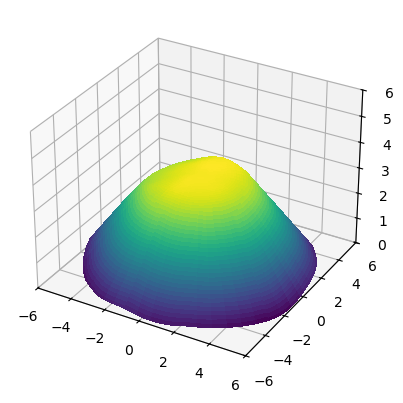

100%|██████████| 1500/1500 [00:13<00:00, 110.80it/s]


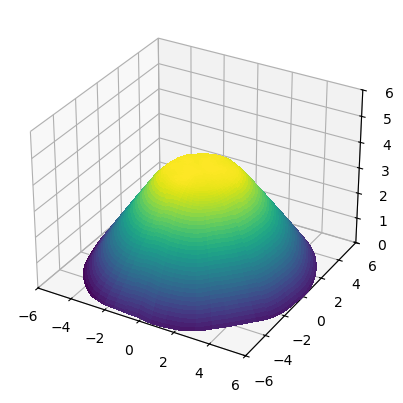

100%|██████████| 1500/1500 [00:14<00:00, 103.88it/s]


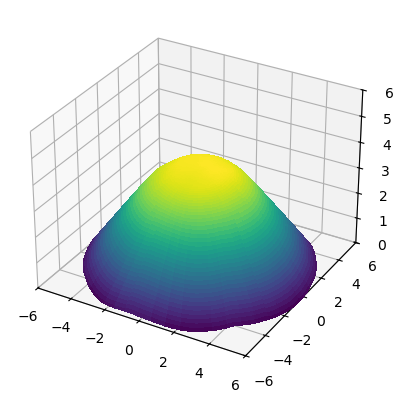

100%|██████████| 1500/1500 [00:14<00:00, 103.14it/s]


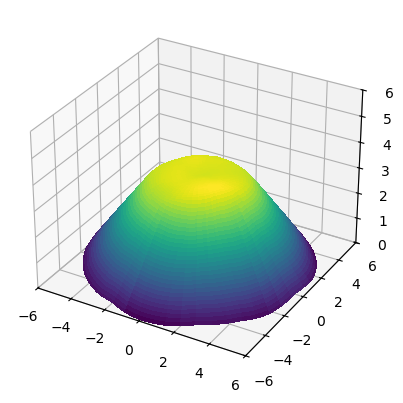

100%|██████████| 1500/1500 [00:14<00:00, 105.69it/s]


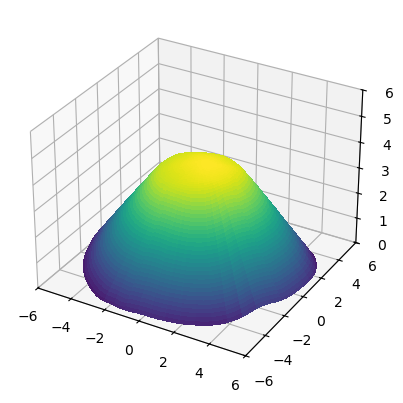

100%|██████████| 1500/1500 [00:13<00:00, 114.79it/s]


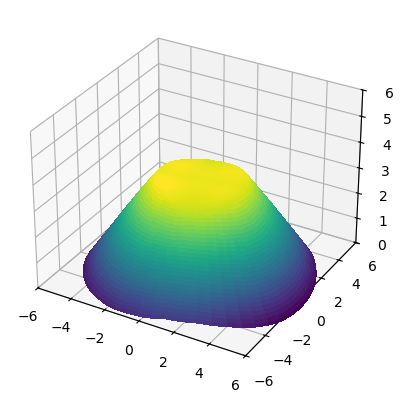

100%|██████████| 1500/1500 [00:12<00:00, 117.58it/s]


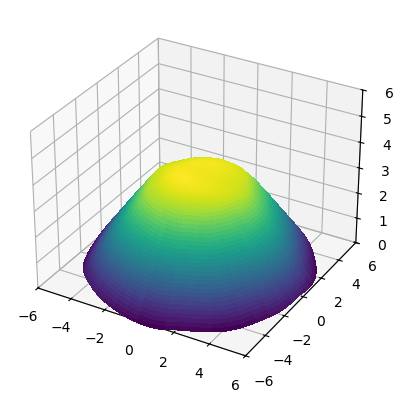

100%|██████████| 1500/1500 [00:13<00:00, 114.80it/s]


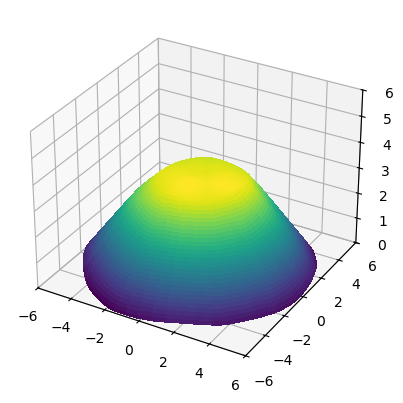

100%|██████████| 1500/1500 [00:13<00:00, 112.67it/s]


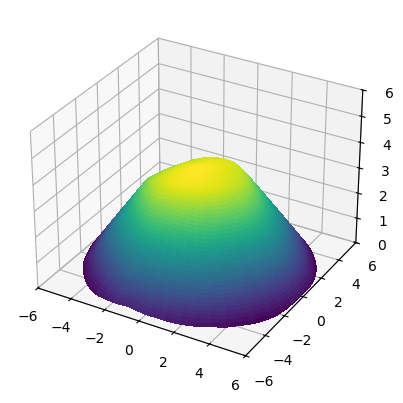

100%|██████████| 1500/1500 [00:15<00:00, 94.74it/s]


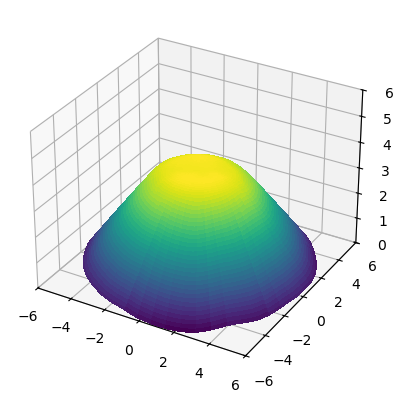

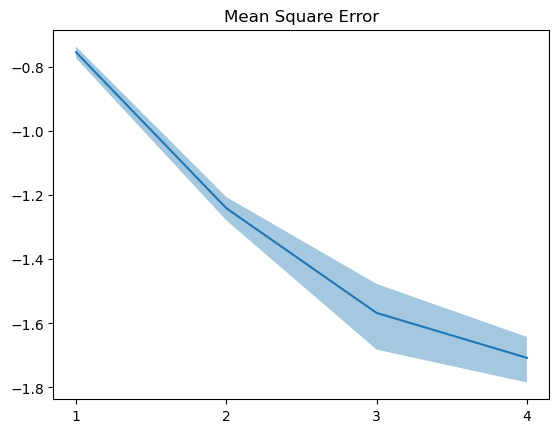

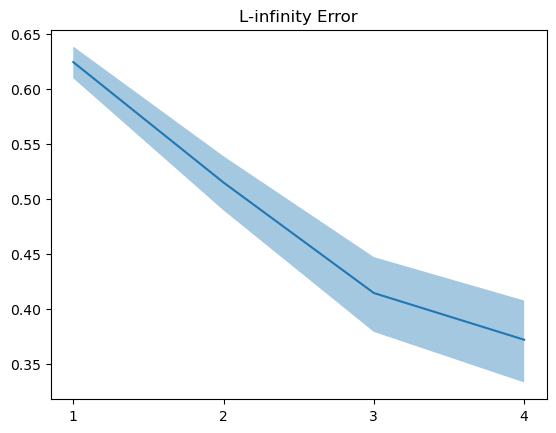

100%|██████████| 1500/1500 [00:19<00:00, 75.05it/s]


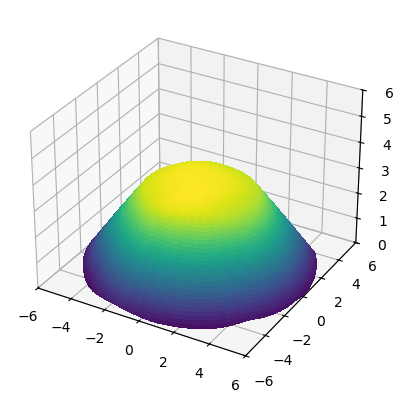

100%|██████████| 1500/1500 [00:17<00:00, 85.76it/s]


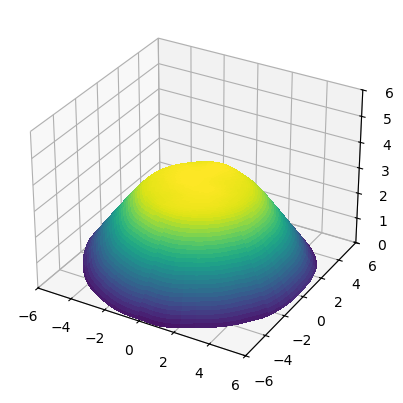

100%|██████████| 1500/1500 [00:17<00:00, 87.02it/s]


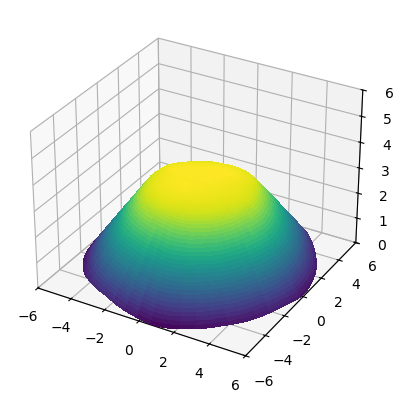

100%|██████████| 1500/1500 [00:17<00:00, 85.08it/s]


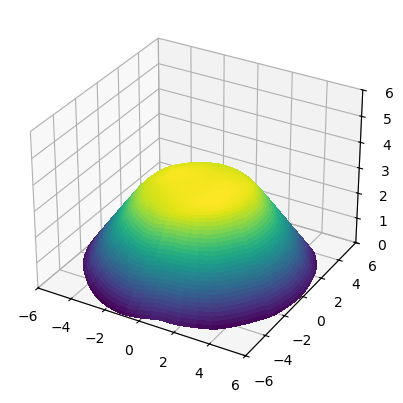

100%|██████████| 1500/1500 [00:19<00:00, 78.36it/s]


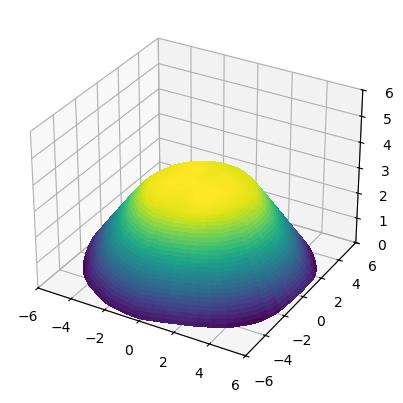

100%|██████████| 1500/1500 [00:21<00:00, 69.86it/s]


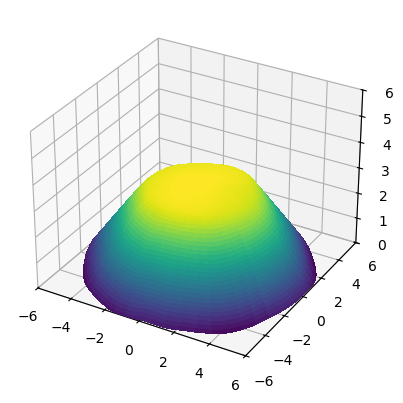

100%|██████████| 1500/1500 [00:17<00:00, 87.05it/s] 


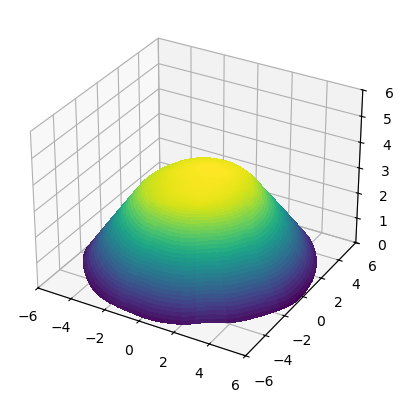

100%|██████████| 1500/1500 [00:18<00:00, 83.12it/s]


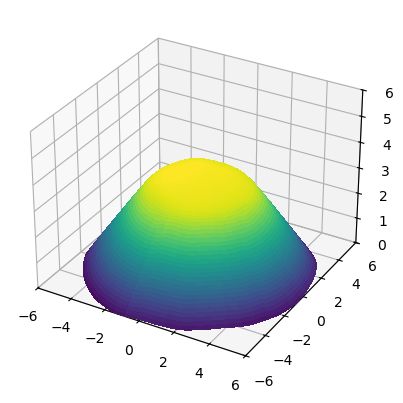

100%|██████████| 1500/1500 [00:18<00:00, 80.68it/s]


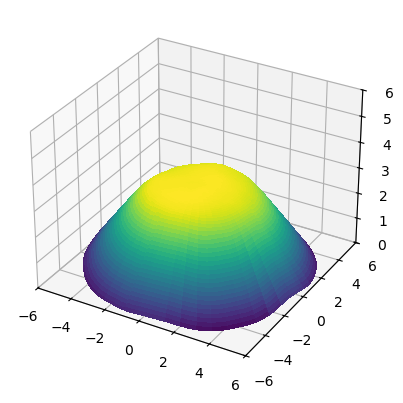

100%|██████████| 1500/1500 [00:21<00:00, 68.65it/s]


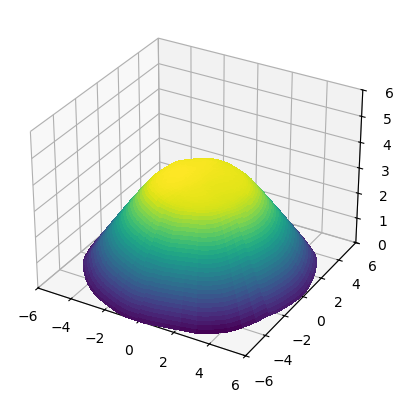

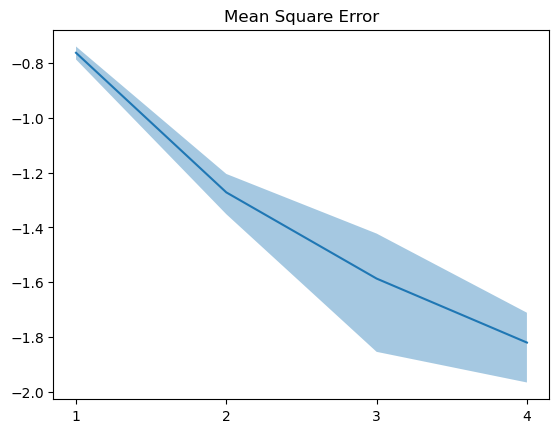

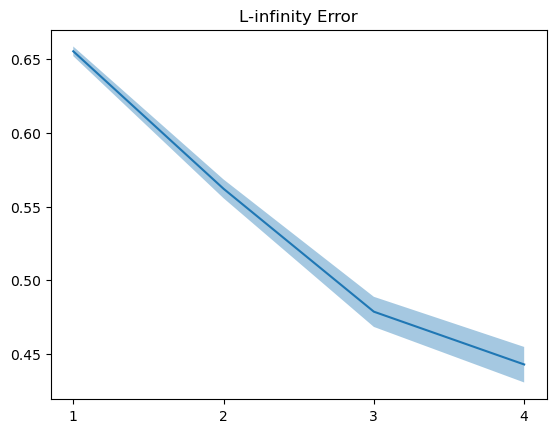

100%|██████████| 3000/3000 [00:38<00:00, 77.81it/s]


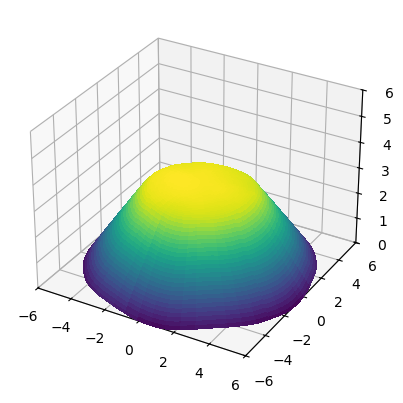

100%|██████████| 3000/3000 [00:34<00:00, 85.95it/s]


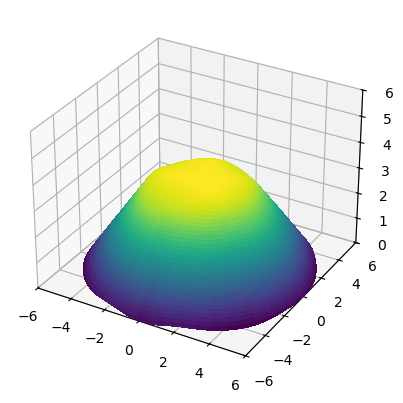

100%|██████████| 3000/3000 [00:43<00:00, 69.27it/s]


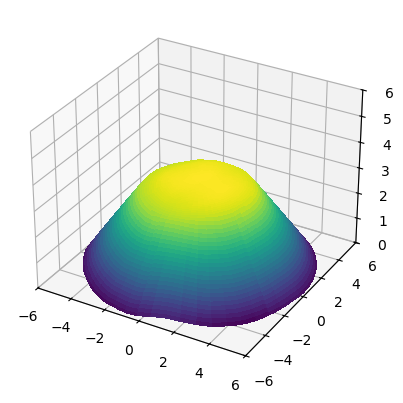

100%|██████████| 3000/3000 [00:36<00:00, 83.13it/s]


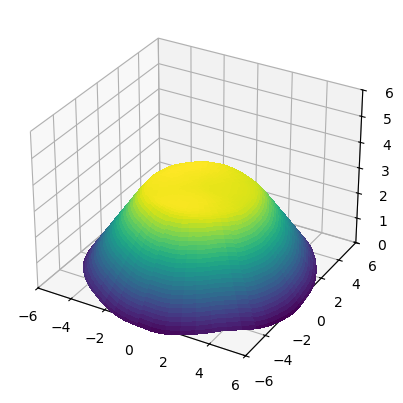

100%|██████████| 3000/3000 [00:35<00:00, 84.82it/s]


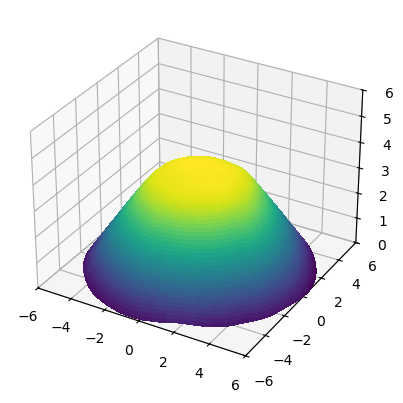

100%|██████████| 3000/3000 [00:43<00:00, 69.01it/s]


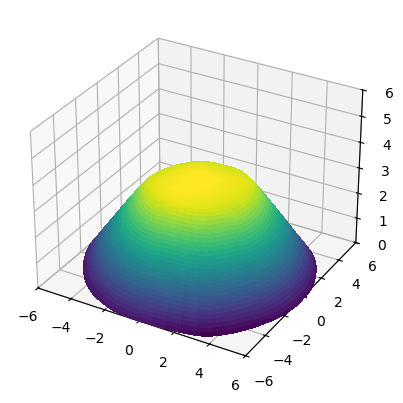

100%|██████████| 3000/3000 [00:40<00:00, 74.09it/s]


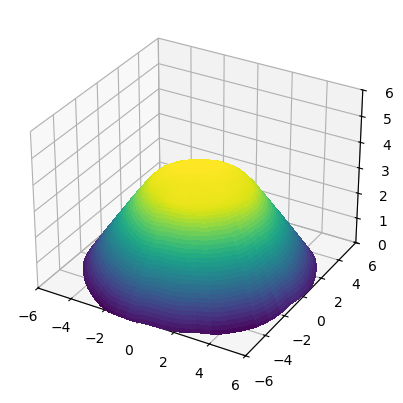

100%|██████████| 3000/3000 [00:34<00:00, 87.59it/s]


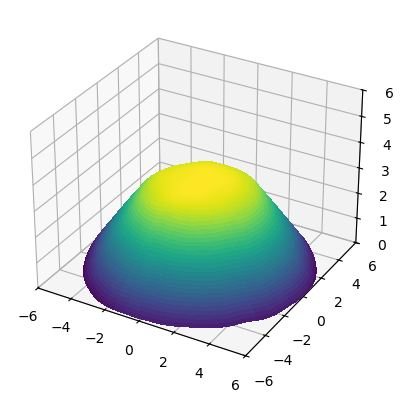

100%|██████████| 3000/3000 [00:40<00:00, 73.35it/s]


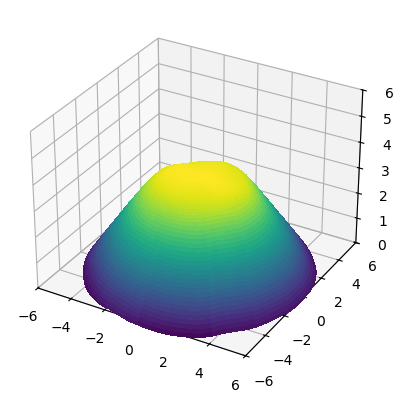

100%|██████████| 3000/3000 [00:38<00:00, 78.94it/s]


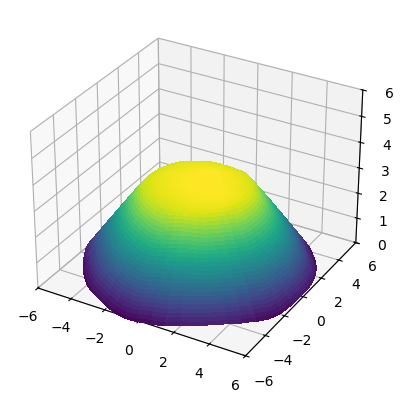

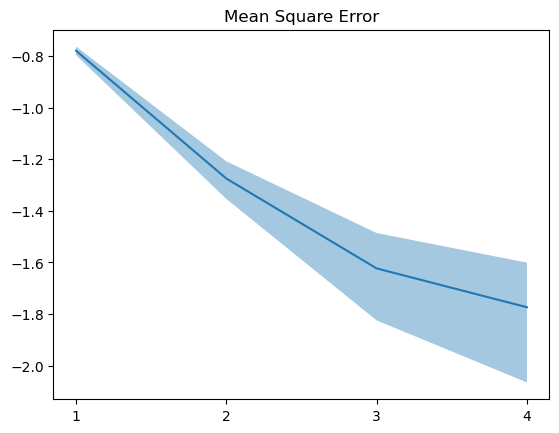

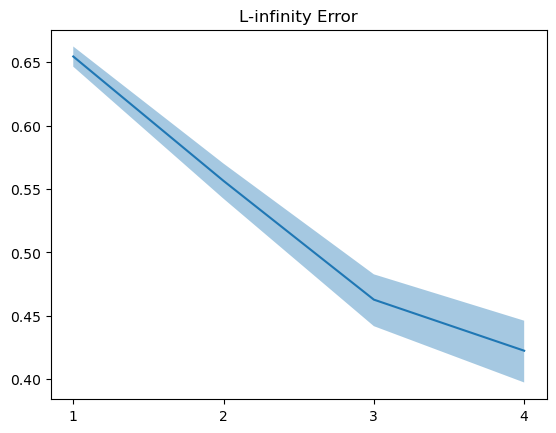

100%|██████████| 1500/1500 [00:12<00:00, 119.71it/s]


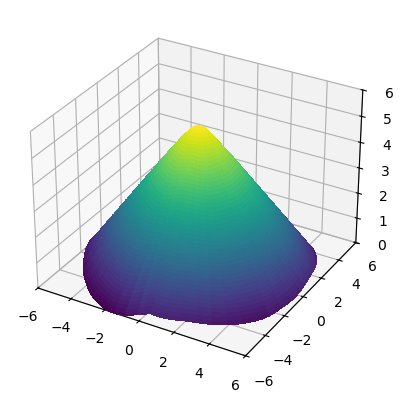

100%|██████████| 1500/1500 [00:12<00:00, 117.13it/s]


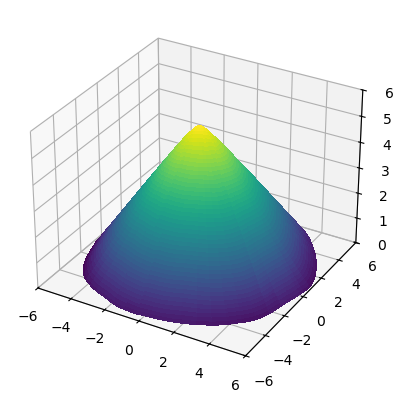

100%|██████████| 1500/1500 [00:12<00:00, 120.65it/s]


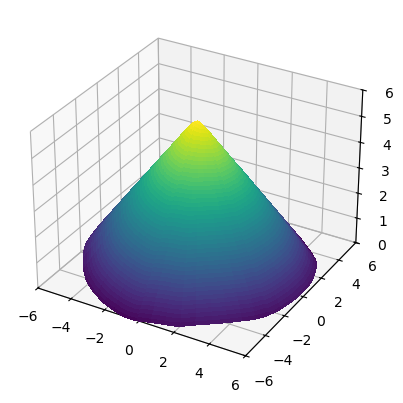

100%|██████████| 1500/1500 [00:14<00:00, 100.63it/s]


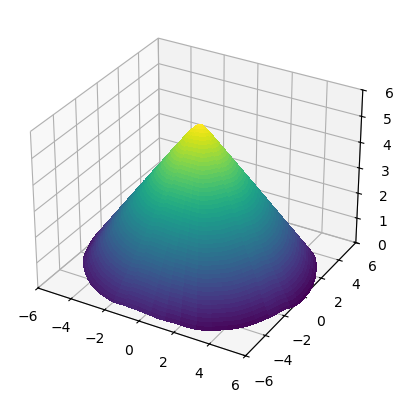

100%|██████████| 1500/1500 [00:15<00:00, 96.92it/s] 


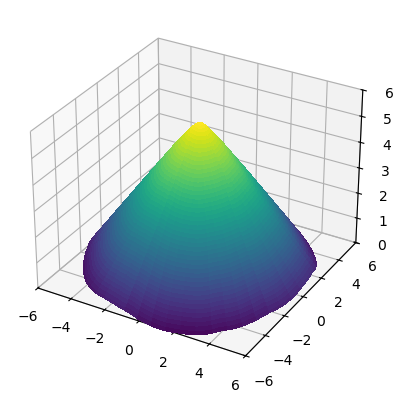

100%|██████████| 1500/1500 [00:13<00:00, 113.70it/s]


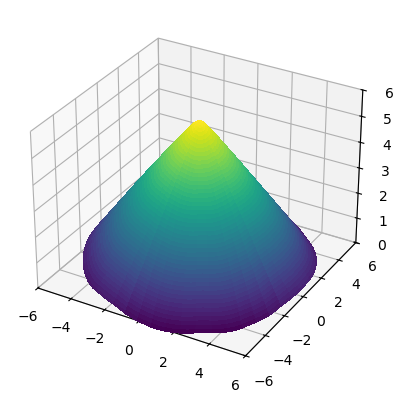

100%|██████████| 1500/1500 [00:14<00:00, 103.69it/s]


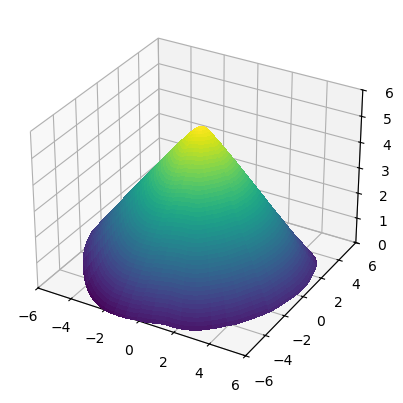

100%|██████████| 1500/1500 [00:12<00:00, 118.50it/s]


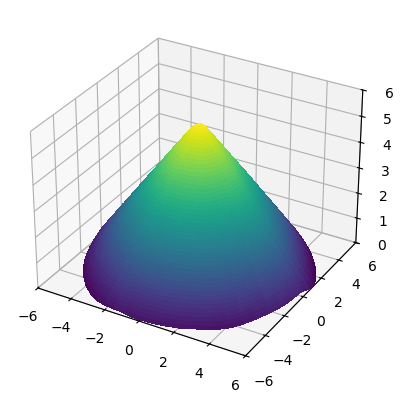

100%|██████████| 1500/1500 [00:13<00:00, 113.05it/s]


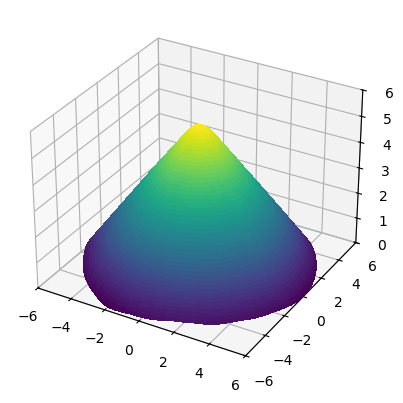

100%|██████████| 1500/1500 [00:15<00:00, 98.72it/s] 


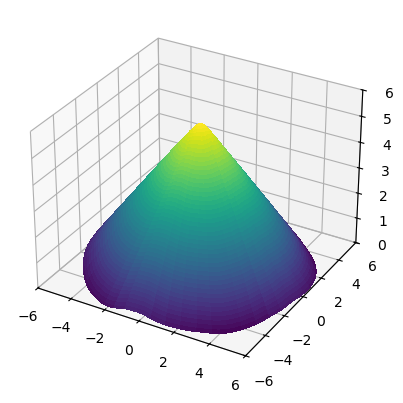

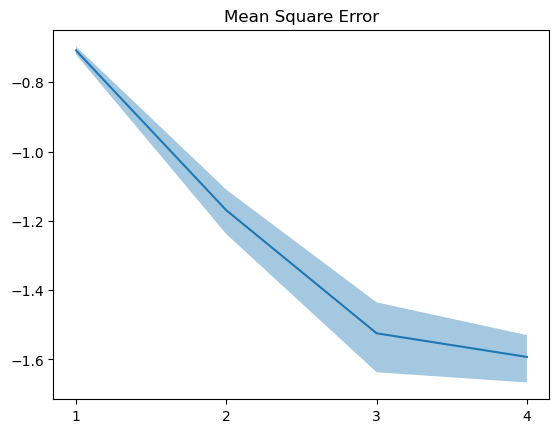

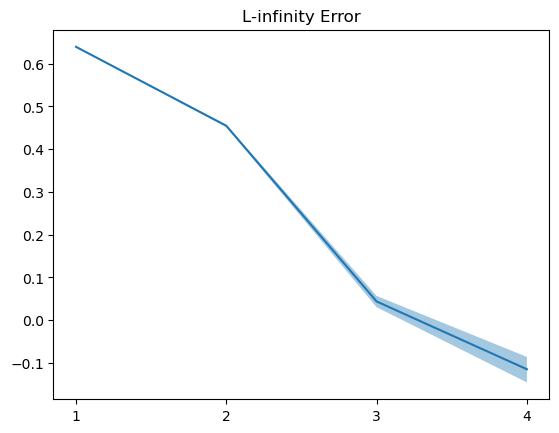

100%|██████████| 1500/1500 [00:19<00:00, 75.89it/s]


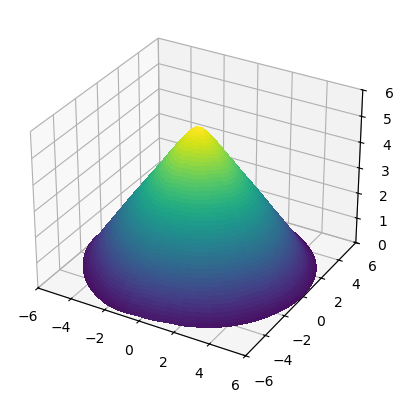

100%|██████████| 1500/1500 [00:18<00:00, 81.50it/s]


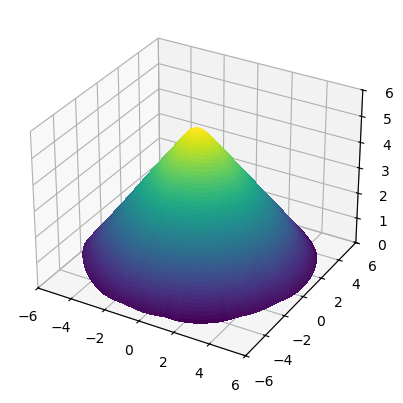

100%|██████████| 1500/1500 [00:17<00:00, 84.67it/s]


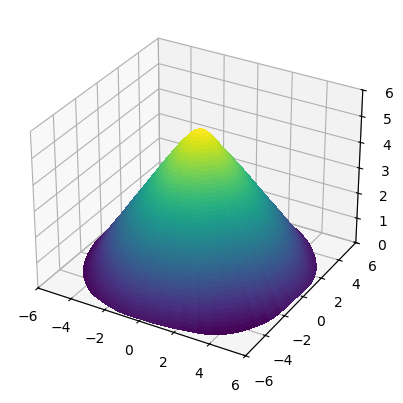

100%|██████████| 1500/1500 [00:17<00:00, 84.93it/s]


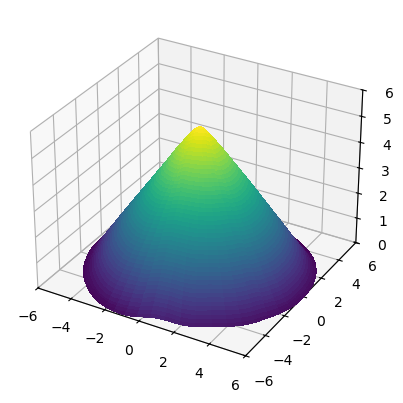

100%|██████████| 1500/1500 [00:20<00:00, 72.74it/s]


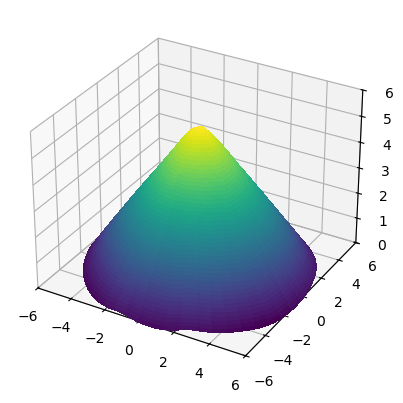

100%|██████████| 1500/1500 [00:20<00:00, 74.80it/s]


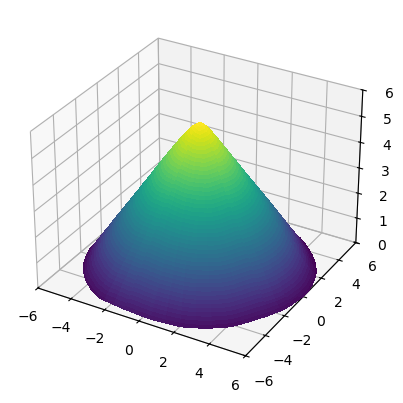

100%|██████████| 1500/1500 [00:18<00:00, 80.29it/s]


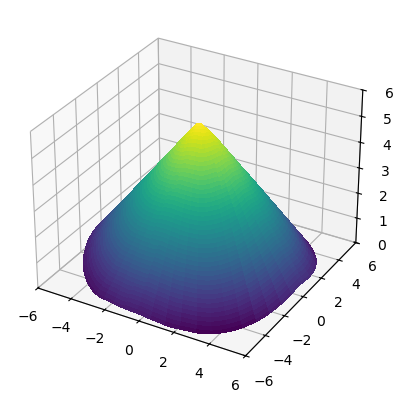

100%|██████████| 1500/1500 [00:17<00:00, 85.61it/s]


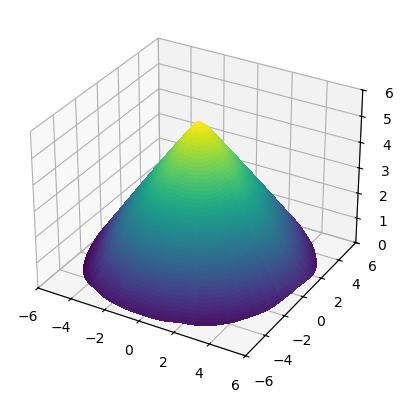

100%|██████████| 1500/1500 [00:19<00:00, 76.89it/s]


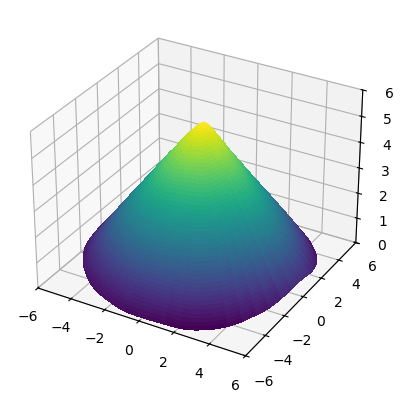

100%|██████████| 1500/1500 [00:22<00:00, 66.73it/s]


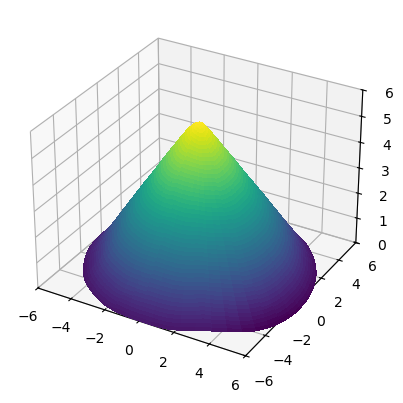

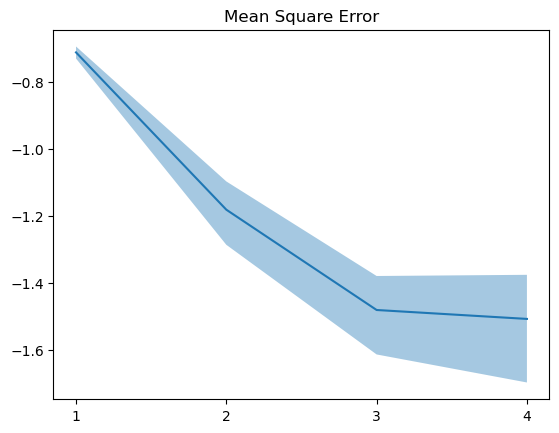

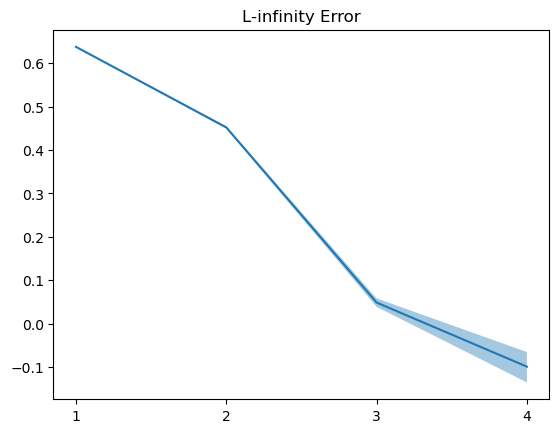

100%|██████████| 3000/3000 [00:40<00:00, 74.16it/s]


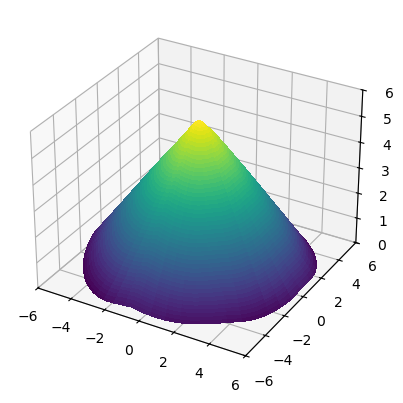

100%|██████████| 3000/3000 [00:36<00:00, 82.72it/s]


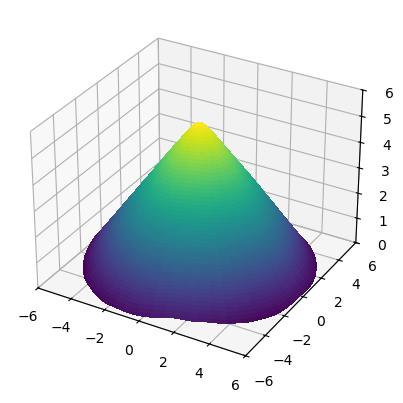

100%|██████████| 3000/3000 [00:45<00:00, 65.46it/s]


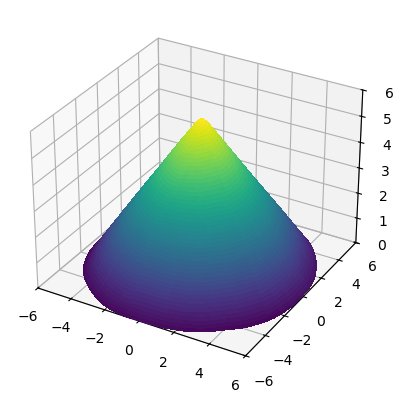

100%|██████████| 3000/3000 [00:40<00:00, 73.97it/s]


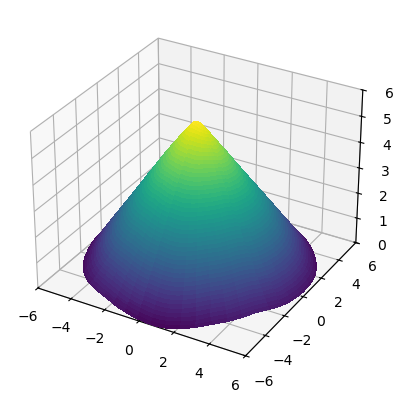

100%|██████████| 3000/3000 [00:38<00:00, 78.21it/s]


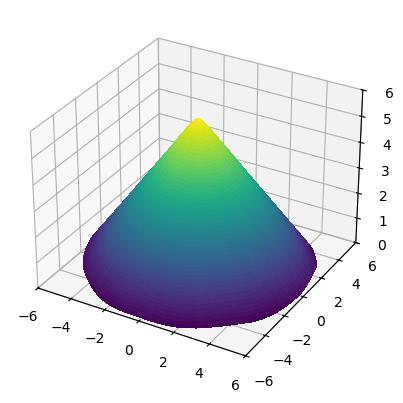

100%|██████████| 3000/3000 [00:40<00:00, 73.71it/s]


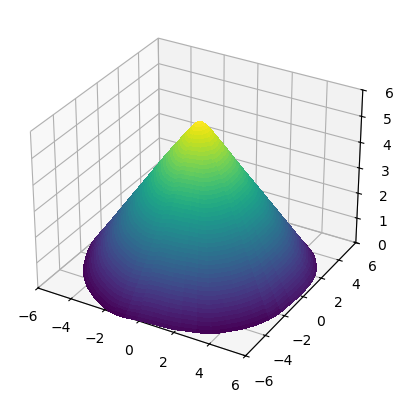

100%|██████████| 3000/3000 [00:39<00:00, 76.56it/s]


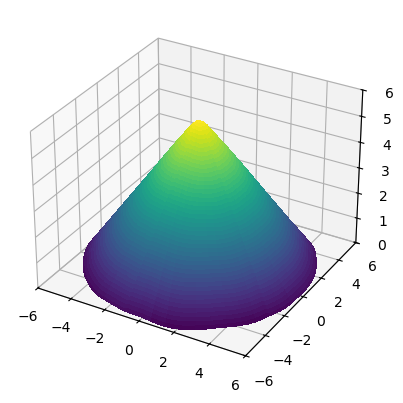

100%|██████████| 3000/3000 [00:38<00:00, 77.76it/s]


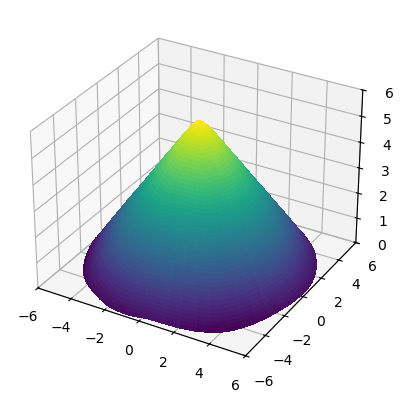

100%|██████████| 3000/3000 [00:39<00:00, 76.28it/s]


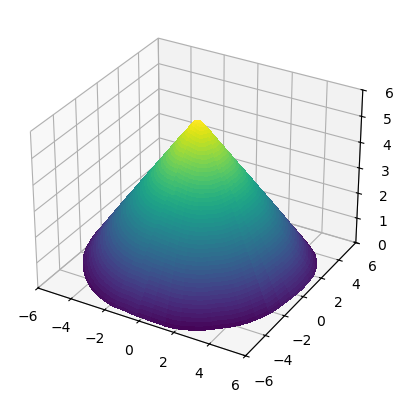

100%|██████████| 3000/3000 [00:35<00:00, 83.49it/s]


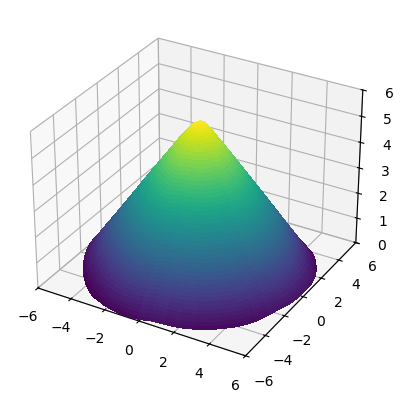

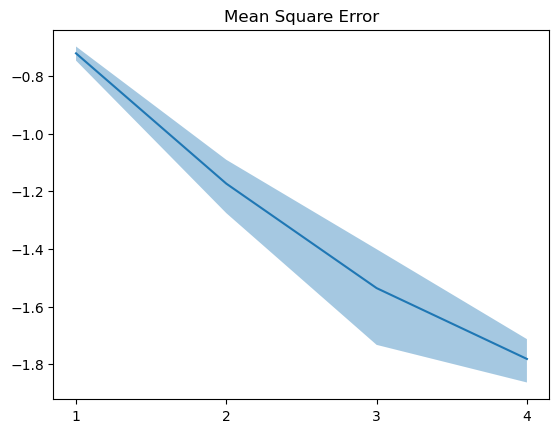

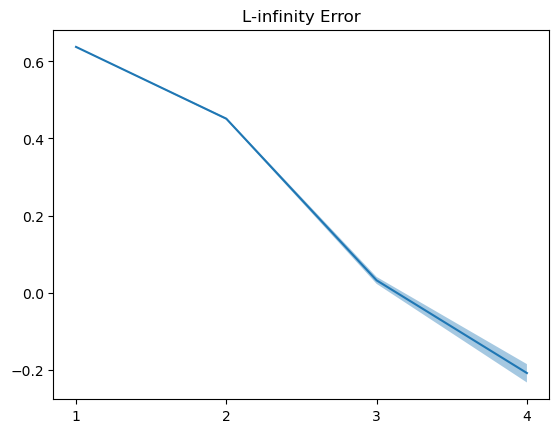

In [3]:
from Training.training import train
from error_test.disc_error import error_ball

MSE_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
L_inf_error_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
run_times = torch.zeros([n_experiments, n_experiments_rep])


for j in range(n_experiments):
        
    for k in range(n_experiments_rep):
        
        if distr_list[j] == 0:
            domain = data_gen_ball_unif(radii, dim_list[j])
        elif distr_list[j] == 1:
            domain = data_gen_ball(radii, dim_list[j])
        else:
            domain == None
        
        if len(arch_list[j]) == 2:        
            NN = FCFF_3L([dim_list[j]] + arch_list[j])
        else:
            NN = FCFF_4L([dim_list[j]] + arch_list[j])
        
        training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)
    
        time = 0.
    
        for i in range(rounds):
    
            training_params['alpha'] = alpha_list[j][i]
            training_params['delta'] = delta_list[j][i]
            
            training_params['n_coloc_points'] = N_col_list[j][i]
            training_params['n_boundary_points'] = N_b_list[j][i]
            training_params['num_iterations'] = num_iterations_list[j][i]
            
            t0 = t()
            total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
            time += t() - t0
        
            MC_points = int(1e6) # Number of grid points for comparison with the ground truth
            MSE, L_inf = error_ball(NN, max(radii), MC_points)
        
            MSE_history[j,k,i] = MSE
            L_inf_error_history[j,k,i] = L_inf
    
        run_times[j,k] = time

        axis1 = 0
        axis2 = 1
        n_theta = 100
        n_r = 200
        plot_2d_proj_disc(axis1, axis2, NN, n_theta, n_r, radii)
    
    plt.plot(np.arange(rounds), MSE_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (MSE_history[j].mean(0) - MSE_history[j].std(0)).log10(),
                     (MSE_history[j].mean(0) + MSE_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('Mean Square Error')
    plt.show()
    
    plt.plot(np.arange(rounds), L_inf_error_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (L_inf_error_history[j].mean(0) - L_inf_error_history[j].std(0)).log10(),
                     (L_inf_error_history[j].mean(0) + L_inf_error_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('L-infinity Error')
    plt.show()

MSE_average = MSE_history.mean(1)
MSE_std = MSE_history.std(1)

Linf_average = L_inf_error_history.mean(1)
Linf_std = L_inf_error_history.std(1)

run_time_avg = run_times.mean(1) 

In [4]:
run_time_avg = run_times.mean(1) 

import pandas as pd
import numpy as np

distr_list_tab = []

for i in range(len(distr_list)):
    if distr_list[i]==0:
        distr_list_tab.append('Unif.')
    elif distr_list[i]==1:
        distr_list_tab.append('Rad.')
    

training_features = pd.DataFrame({'Dimension': dim_list,
                               'Distribution': distr_list_tab,
                               'Architecture': arch_list,
                               'delta': delta_list,
                               'alpha': alpha_list,
                               'N': N_col_list,
                               'N_b': N_b_list,
                               'Iterations': num_iterations_list})

run_T = pd.DataFrame({'Runtime (s)': np.array(run_time_avg)}).astype('int')

results_MSE = pd.DataFrame(np.array(MSE_average))
results_Linf = pd.DataFrame(np.array(Linf_average))


display('Mean Square Error', training_features.join(results_MSE).join(run_T).transpose())
display('L-infinity Error', training_features.join(results_Linf).join(run_T).transpose())


#One table

MSE = np.array(MSE_history[:,:,-1])
L_inf_error = np.array(L_inf_error_history[:,:,-1])

data_MSE = pd.DataFrame(MSE.transpose())
means_MSE = data_MSE.mean()
stds_MSE = data_MSE.std()

data_Linf = pd.DataFrame(L_inf_error.transpose())
means_Linf = data_Linf.mean()
stds_Linf = data_Linf.std()

summary_df = pd.DataFrame({
    'MSE': means_MSE.round(3).astype(str) + ' ± ' + stds_MSE.round(3).astype(str),
    'L_inf': means_Linf.round(3).astype(str) + ' ± ' + stds_Linf.round(3).astype(str)
})

display(training_features.join(summary_df).join(run_T).transpose())

'Mean Square Error'

0                         1  \
Dimension                           10                        10   
Distribution                     Unif.                     Unif.   
Architecture                  [40, 40]              [40, 40, 40]   
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]   
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 1500, 1500, 1500]  [1500, 1500, 1500, 1500]   
0                              0.17629                   0.17276   
1                             0.057489                  0.053455   
2                             0.027077                  0.025905   
3                             0.019611                  0.015131   
Runtime (s)                         55                        74   

                                     2                         3  \
Dimension                           10                        10   
Distribution                     Unif.                      Rad.   
Architecture              [40, 40, 40]                  [40, 40]   
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]   
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 2000, 2500, 3000]  [1500, 1500, 1500, 1500]   
0                             0.166048                   0.19577   
1                             0.053105                  0.067693   
2                             0.023819                  0.029883   
3                             0.016848                  0.025535   
Runtime (s)                        115                        55   

                                     4                         5  
Dimension                           10                        10  
Distribution                      Rad.                      Rad.  
Architecture              [40, 40, 40]              [40, 40, 40]  
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]  
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [1500, 1500, 1500, 1500]  [1500, 2000, 2500, 3000]  
0                             0.193847                  0.189872  
1                             0.065768                  0.067033  
2                             0.033012                  0.029094  
3                             0.031051                  0.016522  
Runtime (s)                         77                       121

'L-infinity Error'

0                         1  \
Dimension                           10                        10   
Distribution                     Unif.                     Unif.   
Architecture                  [40, 40]              [40, 40, 40]   
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]   
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 1500, 1500, 1500]  [1500, 1500, 1500, 1500]   
0                             4.212016                  4.520662   
1                             3.273315                  3.647714   
2                             2.597451                   3.01105   
3                             2.355411                  2.773031   
Runtime (s)                         55                        74   

                                     2                         3  \
Dimension                           10                        10   
Distribution                     Unif.                      Rad.   
Architecture              [40, 40, 40]                  [40, 40]   
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]   
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 2000, 2500, 3000]  [1500, 1500, 1500, 1500]   
0                             4.514533                  4.358802   
1                             3.601415                  2.848346   
2                             2.902705                  1.105856   
3                             2.645536                  0.767552   
Runtime (s)                        115                        55   

                                     4                         5  
Dimension                           10                        10  
Distribution                      Rad.                      Rad.  
Architecture              [40, 40, 40]              [40, 40, 40]  
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]  
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [1500, 1500, 1500, 1500]  [1500, 2000, 2500, 3000]  
0                             4.344552                  4.340325  
1                               2.8327                  2.826577  
2                              1.11788                  1.076445  
3                             0.795454                  0.618779  
Runtime (s)                         77                       121

0                         1  \
Dimension                           10                        10   
Distribution                     Unif.                     Unif.   
Architecture                  [40, 40]              [40, 40, 40]   
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]   
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 1500, 1500, 1500]  [1500, 1500, 1500, 1500]   
MSE                       0.02 ± 0.003             0.015 ± 0.004   
L_inf                    2.355 ± 0.202             2.773 ± 0.077   
Runtime (s)                         55                        74   

                                     2                         3  \
Dimension                           10                        10   
Distribution                     Unif.                      Rad.   
Architecture              [40, 40, 40]                  [40, 40]   
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]   
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]   
Iterations    [1500, 2000, 2500, 3000]  [1500, 1500, 1500, 1500]   
MSE                      0.017 ± 0.008             0.026 ± 0.004   
L_inf                    2.646 ± 0.148             0.768 ± 0.053   
Runtime (s)                        115                        55   

                                     4                         5  
Dimension                           10                        10  
Distribution                      Rad.                      Rad.  
Architecture              [40, 40, 40]              [40, 40, 40]  
delta            [0.7, 0.3, 0.1, 0.01]     [0.7, 0.3, 0.1, 0.01]  
alpha             [2.5, 2.0, 1.0, 0.0]      [2.5, 2.0, 1.0, 0.0]  
N                 [200, 200, 200, 200]      [200, 200, 200, 200]  
N_b                   [80, 80, 80, 80]          [80, 80, 80, 80]  
Iterations    [1500, 1500, 1500, 1500]  [1500, 2000, 2500, 3000]  
MSE                      0.031 ± 0.011             0.017 ± 0.003  
L_inf                    0.795 ± 0.064             0.619 ± 0.034  
Runtime (s)                         77                       121

In [5]:
display(training_features.join(summary_df).join(run_T).transpose().to_latex())

'\\begin{tabular}{lllllll}\n\\toprule\n & 0 & 1 & 2 & 3 & 4 & 5 \\\\\n\\midrule\nDimension & 10 & 10 & 10 & 10 & 10 & 10 \\\\\nDistribution & Unif. & Unif. & Unif. & Rad. & Rad. & Rad. \\\\\nArchitecture & [40, 40] & [40, 40, 40] & [40, 40, 40] & [40, 40] & [40, 40, 40] & [40, 40, 40] \\\\\ndelta & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] \\\\\nalpha & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] \\\\\nN & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] \\\\\nN_b & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] \\\\\nIterations & [1500, 1500, 1500, 1500] & [1500, 1500, 1500, 1500] & [1500, 2000, 2500, 3000] & [1500, 1500, 1500, 1500] & [1500, 1500

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_13404\3209648835.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_13404\3209648835.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


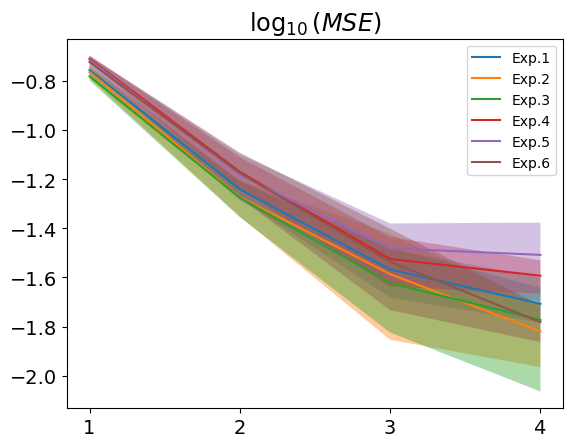

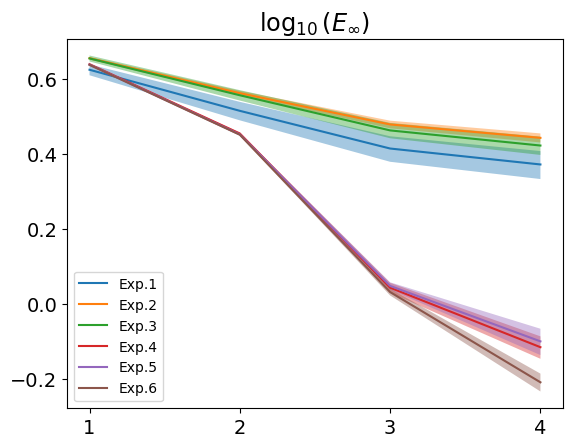

In [6]:
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
for i in range(MSE_history.shape[0]):
    x = np.arange(rounds) + 1
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x, 
            MSE_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (MSE_history[i].mean(0) - MSE_history[i].std(0)).log10(),
                   (MSE_history[i].mean(0) + MSE_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.legend()
plt.show()

ax = host_subplot(111)
for i in range(L_inf_error_history.shape[0]):
    L_inf_log10 = torch.log10(L_inf_error_history[i])
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x,
            L_inf_error_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (L_inf_error_history[i].mean(0) - L_inf_error_history[i].std(0)).log10(),
                   (L_inf_error_history[i].mean(0) + L_inf_error_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.legend()
plt.show()